Detalles del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB
None
Dataset: State
             State  Population  Murder.Rate Abbreviation
0          Alabama     4779736          5.7           AL
1           Alaska      710231          5.6           AK
2          Arizona     6392017          4.7           AZ
3         Arkansas     2915918          5.6           AR
4       California    37253956          4.4           CA
5         Colorado     5029196          2.8           CO
6      Connecticut     3574097          2.4           CT
7         Delaware      897934          5.8           DE
8          Florida    1

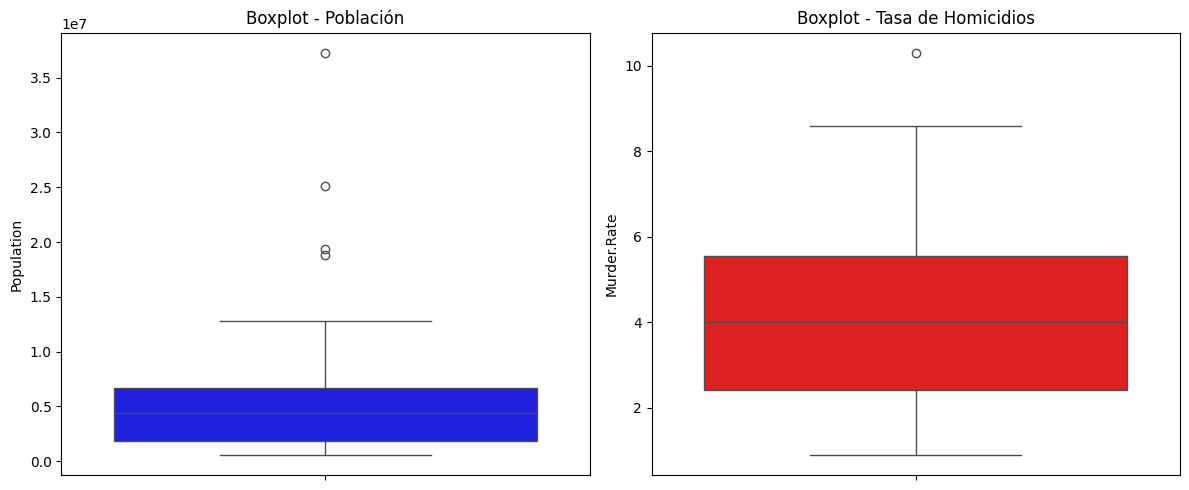

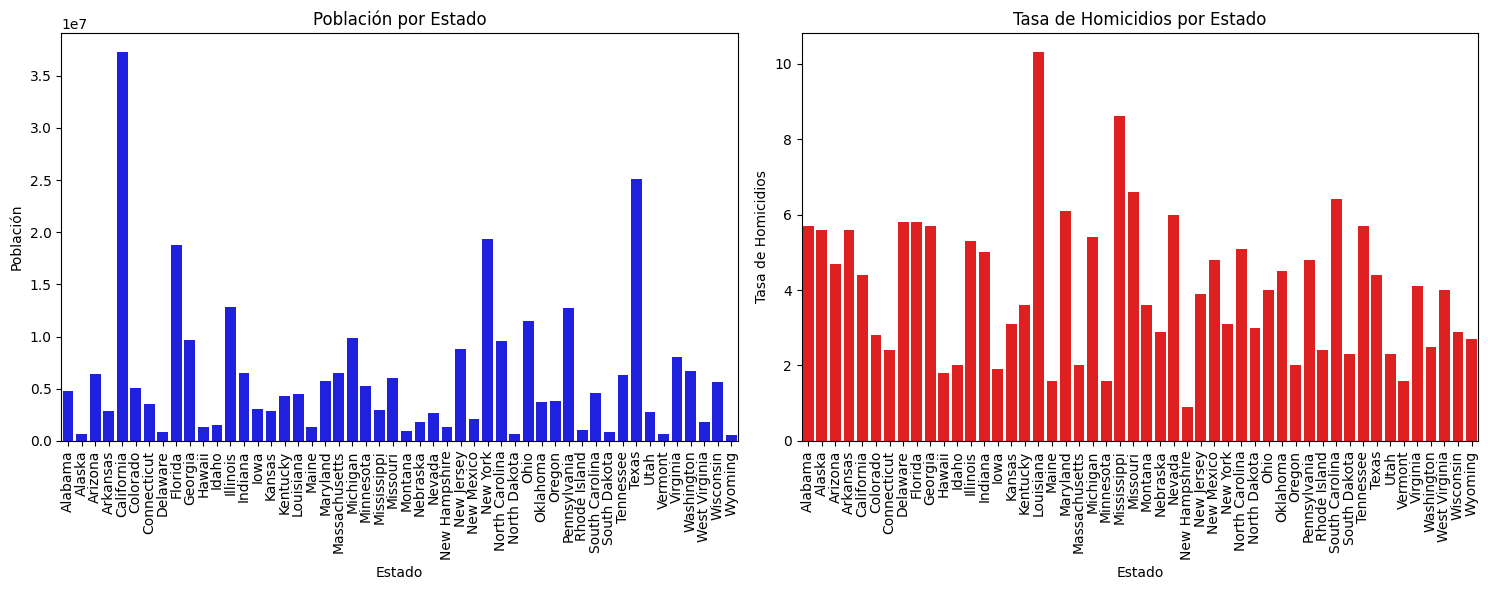

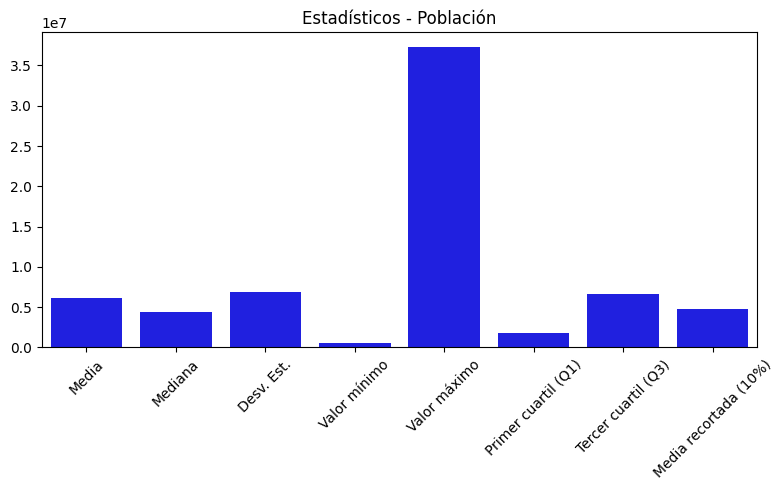

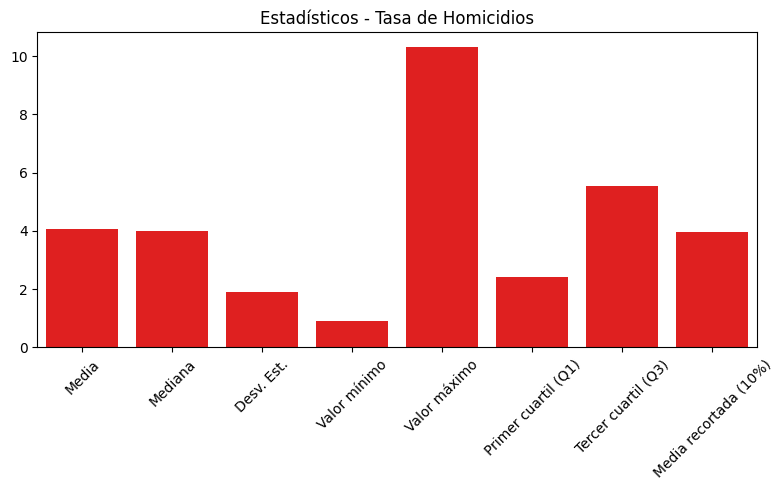

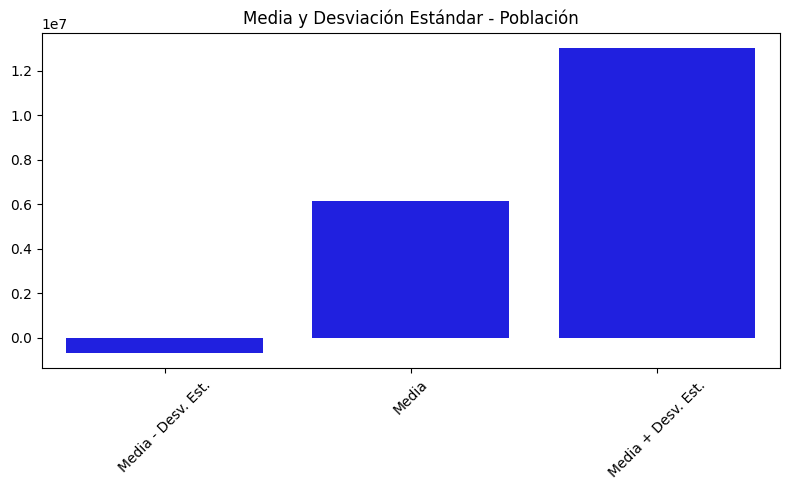

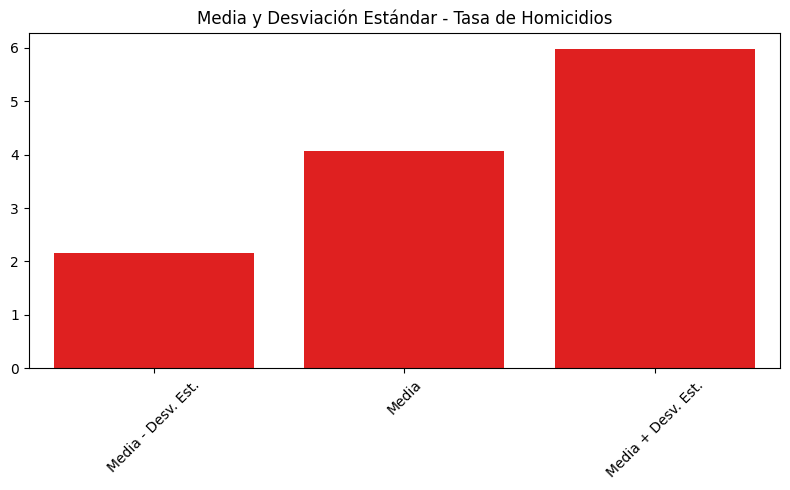

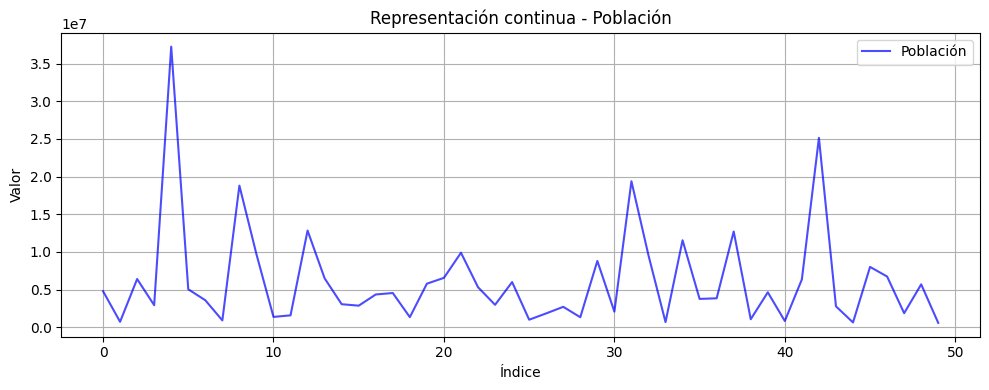

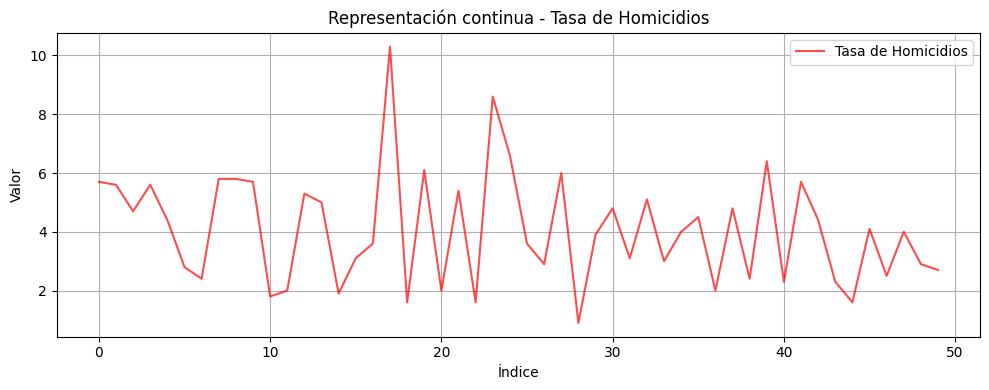

In [3]:
import pandas as pd
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el archivo de datos
ruta_archivo = "/content/state.csv"  # Sustituir con la ubicación real del archivo
datos = pd.read_csv(ruta_archivo)

# Mostrar información general sobre el dataset
print("Detalles del dataset:")
print(datos.info())

print("Dataset: State")
print(datos)

# Extraer las columnas de interés
poblacion = datos.iloc[:, 1]  # Segunda columna: Número de habitantes
tasa_homicidios = datos.iloc[:, 2]  # Tercera columna: Índice de homicidios

# Función para calcular métricas estadísticas básicas
def calcular_estadisticos(columna):
    estadisticos = {
        "Media": round(columna.mean(), 3),
        "Mediana": round(columna.median(), 3),
        "Desviación estándar": round(columna.std(), 3),
        "Varianza": round(columna.var(), 3),
        "Valor mínimo": round(columna.min(), 3),
        "Valor máximo": round(columna.max(), 3),
        "Rango": round(columna.max() - columna.min(), 3),
        "Primer cuartil (Q1)": round(columna.quantile(0.25), 3),
        "Mediana (Q2)": round(columna.median(), 3),
        "Tercer cuartil (Q3)": round(columna.quantile(0.75), 3),
        "Rango intercuartílico (IQR)": round(columna.quantile(0.75) - columna.quantile(0.25), 3),
        "Media recortada (10%)": round(trim_mean(columna, proportiontocut=0.1), 3)
    }
    return pd.Series(estadisticos)

# Crear una tabla con los resultados estadísticos
resultados_estadisticos = pd.DataFrame({
    "Población": calcular_estadisticos(poblacion),
    "Tasa de Homicidios": calcular_estadisticos(tasa_homicidios)
})

# Imprimir los resultados obtenidos
print(resultados_estadisticos)

# Función para generar gráficos de caja (boxplots)
def graficar_boxplots(col1, col2, titulo1, titulo2):
    fig, ejes = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(y=col1, ax=ejes[0], color="blue")
    ejes[0].set_title(titulo1)
    sns.boxplot(y=col2, ax=ejes[1], color="red")
    ejes[1].set_title(titulo2)
    plt.tight_layout()
    plt.show()

# Generar boxplots para las variables seleccionadas
graficar_boxplots(poblacion, tasa_homicidios, "Boxplot - Población", "Boxplot - Tasa de Homicidios")

# Extraer los nombres de los estados (primera columna)
estados = datos.iloc[:, 0]

# Función para graficar datos en barras por estado
def graficar_barras_por_estado(estados, col1, col2, titulo1, titulo2):
    fig, ejes = plt.subplots(1, 2, figsize=(15, 6))
    sns.barplot(x=estados, y=col1, ax=ejes[0], color="blue")
    ejes[0].set_title(titulo1)
    ejes[0].set_xlabel("Estado")
    ejes[0].set_ylabel("Población")
    ejes[0].tick_params(axis='x', rotation=90)

    sns.barplot(x=estados, y=col2, ax=ejes[1], color="red")
    ejes[1].set_title(titulo2)
    ejes[1].set_xlabel("Estado")
    ejes[1].set_ylabel("Tasa de Homicidios")
    ejes[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

# Generar gráficos de barras para visualizar la distribución por estado
graficar_barras_por_estado(estados, poblacion, tasa_homicidios, "Población por Estado", "Tasa de Homicidios por Estado")

# Función para representar gráficamente diferentes estadísticas
def graficar_estadisticos(estadisticos, titulo, color):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x=list(estadisticos.keys()), y=list(estadisticos.values()), color=color)
    ax.set_title(titulo)
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

# Calcular estadísticas para las variables de interés
estadisticos_poblacion = {
    "Media": poblacion.mean(),
    "Mediana": poblacion.median(),
    "Desv. Est.": poblacion.std(),
    "Valor mínimo": poblacion.min(),
    "Valor máximo": poblacion.max(),
    "Primer cuartil (Q1)": poblacion.quantile(0.25),
    "Tercer cuartil (Q3)": poblacion.quantile(0.75),
    "Media recortada (10%)": trim_mean(poblacion, 0.1)
}

estadisticos_homicidios = {
    "Media": tasa_homicidios.mean(),
    "Mediana": tasa_homicidios.median(),
    "Desv. Est.": tasa_homicidios.std(),
    "Valor mínimo": tasa_homicidios.min(),
    "Valor máximo": tasa_homicidios.max(),
    "Primer cuartil (Q1)": tasa_homicidios.quantile(0.25),
    "Tercer cuartil (Q3)": tasa_homicidios.quantile(0.75),
    "Media recortada (10%)": trim_mean(tasa_homicidios, 0.1)
}

# Generar gráficos con los estadísticos calculados
graficar_estadisticos(estadisticos_poblacion, "Estadísticos - Población", "blue")
graficar_estadisticos(estadisticos_homicidios, "Estadísticos - Tasa de Homicidios", "red")

# Función para graficar la media y la desviación estándar
def graficar_media_desviacion(col, titulo, color):
    media = col.mean()
    desviacion = col.std()
    valores = [media - desviacion, media, media + desviacion]
    nombres = ["Media - Desv. Est.", "Media", "Media + Desv. Est."]

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x=nombres, y=valores, color=color)
    ax.set_title(titulo)
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

# Representar gráficamente la media y la desviación estándar
graficar_media_desviacion(poblacion, "Media y Desviación Estándar - Población", "blue")
graficar_media_desviacion(tasa_homicidios, "Media y Desviación Estándar - Tasa de Homicidios", "red")

# Función para graficar la evolución de los valores de una columna
def graficar_serie_temporal(col, titulo, color):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(np.linspace(0, len(col) - 1, len(col)), col, label=titulo, color=color, alpha=0.7)
    ax.set_title(f"Representación continua - {titulo}")
    ax.set_xlabel("Índice")
    ax.set_ylabel("Valor")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

# Graficar la evolución de la población y la tasa de homicidios
graficar_serie_temporal(poblacion, "Población", "blue")
graficar_serie_temporal(tasa_homicidios, "Tasa de Homicidios", "red")
